cluster 0: ---------------------------------------
[['"Sri Lanka probes aid groups for suspected rebel links"'],
 ['"Bangladesh names new caretaker chief, lifts curbs"'],
 ['"Stars\' acceptance speeches worthy of own awards"'],
 ['"Maritime IPO activity seen thin in 2007"'],
 ['"RPT-IPO VIEW-Fortress success to spur followers"'],
 ['"Base metals soar as bulls dominate sentiment"'],
 ['"Mexico strike closes most Penoles mines, gold ops"'],
 ['"Russia seeks to boost nuclear sales to South Africa"'],
 ['"Steel Partners: open to selling stake in Sapporo"']]
cluster 1: ---------------------------------------
[['"Iraq expects only slight tuning in U.S. policy"'],
 ['"U.S. says attack in Greece an isolated incident"'],
 ['"Garber set in Stone with ABC drama"'],
 ['"Contraceptive side effects study needed - US panel"'],
 ['"PRESS DIGEST - Washington Post Business - Jan. 27"'],
 ['"TREASURIES-Soft inflation data pushes bonds higher"'],
 ['"UPDATE 1-Calstrs, Time Warner settle fraud lawsuit"'],


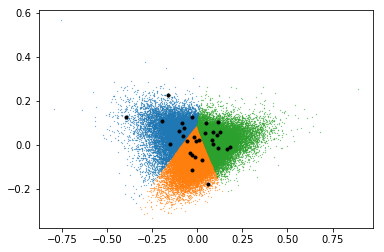

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pprint as pp

def corpusNumLines():
    num_lines_in_corpus = !wc -l $corpus_train_file | sed "s/$corpus_train_file//g;"
    num_lines_in_corpus = int(num_lines_in_corpus.s)
    return num_lines_in_corpus

#  parameters
docvec_file = "docvec60000"
docvec = np.load(docvec_file)
corpus_train_file = "split60000aa"
num_cluster = 3
num_lines_in_corpus = corpusNumLines()
num_randpick = 30

reduced_data = PCA(n_components=2).fit_transform(docvec)
kmeans = KMeans(init='k-means++', n_clusters= num_cluster, n_init=20)
fit_reduced_data = kmeans.fit(reduced_data)

#print("----- Labels -----")
#print(fit_reduced_data.labels_)

news_randpick_index = np.random.randint(0,num_lines_in_corpus-1,num_randpick)
news_randpick_label = fit_reduced_data.labels_[news_randpick_index]
# sort them according to label
news_randpick_label, news_randpick_index = (list(t) for t in zip(*sorted(zip(news_randpick_label, news_randpick_index))))

news_randpick_title = []
for num in news_randpick_index:
    title = !sed -n "$num"p $corpus_train_file
    news_randpick_title.append(title)

"""
for num in range(num_cluster):
    news_cluster = news_randpick_index[news_randpick_label==num]
    news_cluster 
"""

for num in range(num_cluster):
    print("cluster " + str(num) + ": ---------------------------------------")
    count = sum(i == num for i in news_randpick_label)
    pp.pprint(news_randpick_title[0:count])
    news_randpick_title = news_randpick_title[count:]

for num in range(num_cluster):
    condition = fit_reduced_data.labels_ == num
    filtered_reduced_data_x = reduced_data[condition,0]
    filtered_reduced_data_y = reduced_data[condition,1]
    plt.plot(filtered_reduced_data_x, filtered_reduced_data_y, '.', markersize=0.5)

plt.plot(reduced_data[news_randpick_index, 0], reduced_data[news_randpick_index, 1], 'k.')
plt.show()
